In [1]:
# ML Spotify data
# Predictions on Year, Genre, War/peace, Ruling party
import spotipy
import pandas as pd
import pprint as pprint
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# from scipy.stats import linregress
import matplotlib.pyplot as plt
from numpy.random import seed
seed(1)
from config import client_id
from config import client_secret
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id,
                                                     client_secret)
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

In [2]:
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
billboard = pd.read_csv('final.csv')
billboard_df = pd.DataFrame(billboard)

In [4]:
billboard_df.head()

,URI,Artist,Song,Release Date,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Loudness,Speechiness,Tempo,Valence,Duration (ms),WH,War?,Decade
0,spotify:track:1fhLgOJgIIZEsWWffk8ljs,The Weavers,Goodnight Irene,1950,13,0.832,0.367,0.261,0.000000,-10.404,0.0289,140.820,0.576,202240,D,War,1950
1,spotify:track:5dae01pKNjRQtgOeAkFzPY,Nat King Cole,Mona Lisa,1950,51,0.948,0.251,0.225,0.000000,-12.125,0.0347,166.320,0.324,194987,D,War,1950
2,spotify:track:68GJRIs9vkHFy9l0Sbdsix,Various Artists,The Third Man (The Harry Lime Theme),1950,12,0.911,0.473,0.161,0.909000,-17.505,0.0328,131.775,0.364,149964,D,War,1950
3,spotify:track:33FdwvfiSBRbE2AQ4UehaR,Bing Crosby,Play A Simple Melody - Single Version,1950,10,0.771,0.630,0.222,0.000002,-13.740,0.0522,138.497,0.778,175693,D,War,1950
4,spotify:track:68ZOKozM9xmlp1iwaQSwY7,Teresa Brewer,Music! Music! Music!,1950,26,0.688,0.761,0.448,0.000019,-14.350,0.0402,99.078,0.928,162400,D,War,1950


In [5]:
# Year Predictor
len(billboard_df)
billboard_df.columns

Index(['URI', 'Artist', 'Song', 'Release Date', 'Popularity', 'Acousticness',
       'Danceability', 'Energy', 'Instrumentalness', 'Loudness', 'Speechiness',
       'Tempo', 'Valence', 'Duration (ms)', 'WH', 'War?', 'Decade'],
      dtype='object')

In [6]:
X = billboard_df[['Popularity', 'Acousticness',
       'Danceability', 'Energy', 'Instrumentalness', 'Loudness', 'Speechiness',
       'Tempo', 'Valence', 'Duration (ms)']]
y = billboard_df['Release Date'].values.reshape(-1, 1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [31]:
### BEGIN SOLUTION
model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.655456853701242
Testing Score: 0.7081432704068881


Text(0.5, 1.0, 'Residual Plot')

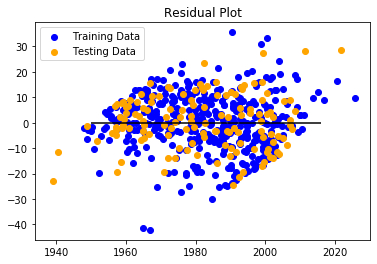

In [32]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [33]:
model.score(X_test_scaled, y_test)

0.7081432704068881

In [34]:
model.predict(X_test_scaled)

array([[1979.15628571],
       [1951.72927785],
       [1988.94825931],
       [1963.80957633],
       [2021.72741382],
       [1978.53764297],
       [1999.33143752],
       [1991.22528793],
       [1993.51668571],
       [1958.66916615],
       [1957.43369762],
       [1995.75184646],
       [2002.28841905],
       [1979.51895946],
       [1977.34429978],
       [1973.95723575],
       [2002.23825153],
       [1960.0123208 ],
       [2001.72108999],
       [2007.63417862],
       [1964.77785998],
       [1989.82149415],
       [2006.29463224],
       [1972.13945946],
       [1992.81295404],
       [1948.81017335],
       [1992.21011164],
       [1975.44052918],
       [1966.81253862],
       [1978.76267309],
       [1967.24762253],
       [1987.19603016],
       [1957.15146426],
       [2005.49494187],
       [2000.60918541],
       [2007.05292371],
       [1982.37304803],
       [1998.80376442],
       [2000.57256391],
       [1982.7123216 ],
       [1981.99813758],
       [1986.128

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=53, random_state=897)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

C:\Users\kalbrecht\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.06569343065693431

In [39]:
rf.predict(X_test_scaled)

array([1996, 1961, 1979, 1962, 1990, 1991, 1973, 1990, 2005, 1963, 1969,
       1987, 2005, 1964, 1982, 1982, 1984, 1957, 2002, 2000, 1964, 2013,
       1984, 1966, 1984, 1953, 2015, 1965, 1954, 1982, 1969, 1979, 1953,
       1995, 2009, 2005, 1973, 1978, 2012, 1992, 1964, 2002, 1952, 1991,
       1977, 1981, 1958, 1965, 1982, 2015, 1954, 2001, 1969, 2000, 1966,
       1983, 1951, 1983, 2014, 2010, 2008, 1990, 1989, 1987, 1978, 1957,
       1962, 1986, 1999, 1962, 2002, 1972, 1986, 1953, 2001, 1962, 1968,
       1955, 1958, 2013, 1962, 1966, 1952, 1965, 1978, 1952, 2002, 1990,
       1954, 1958, 2008, 1955, 2009, 1985, 1965, 1959, 1975, 1968, 1957,
       1955, 1988, 1950, 1972, 1975, 1952, 1986, 1954, 1964, 1962, 1954,
       1950, 1980, 1968, 1985, 1981, 2015, 1997, 1954, 1970, 1986, 1975,
       1962, 1979, 2000, 2004, 2009, 1959, 1996, 1965, 2000, 1975, 1964,
       1968, 1961, 2010, 2012, 1977], dtype=int64)

In [69]:
df= pd.DataFrame(y_test, columns=["Actual"])

In [70]:
df["prediction"]=rf.predict(X_test_scaled)

In [71]:
df["decade"]=df["Actual"]

In [72]:
df["decade"]=df["decade"].astype(str)

In [73]:
df["decade"].str.split("")

0      [, 1, 9, 7, 2, ]
1      [, 1, 9, 5, 9, ]
2      [, 1, 9, 9, 2, ]
3      [, 1, 9, 6, 1, ]
4      [, 1, 9, 9, 3, ]
5      [, 1, 9, 7, 6, ]
6      [, 1, 9, 7, 2, ]
7      [, 1, 9, 8, 0, ]
8      [, 2, 0, 1, 3, ]
9      [, 1, 9, 7, 4, ]
10     [, 1, 9, 5, 0, ]
11     [, 1, 9, 9, 2, ]
12     [, 2, 0, 0, 0, ]
13     [, 1, 9, 8, 1, ]
14     [, 1, 9, 8, 0, ]
15     [, 1, 9, 8, 8, ]
16     [, 2, 0, 1, 0, ]
17     [, 1, 9, 5, 6, ]
18     [, 2, 0, 0, 6, ]
19     [, 2, 0, 1, 0, ]
20     [, 1, 9, 5, 9, ]
21     [, 2, 0, 0, 3, ]
22     [, 2, 0, 1, 5, ]
23     [, 1, 9, 7, 7, ]
24     [, 1, 9, 8, 7, ]
25     [, 1, 9, 5, 0, ]
26     [, 1, 9, 9, 6, ]
27     [, 1, 9, 7, 3, ]
28     [, 1, 9, 5, 1, ]
29     [, 1, 9, 7, 0, ]
             ...       
107    [, 1, 9, 5, 6, ]
108    [, 1, 9, 6, 9, ]
109    [, 1, 9, 5, 5, ]
110    [, 1, 9, 6, 2, ]
111    [, 1, 9, 9, 0, ]
112    [, 1, 9, 8, 7, ]
113    [, 1, 9, 8, 5, ]
114    [, 1, 9, 7, 9, ]
115    [, 2, 0, 1, 6, ]
116    [, 1, 9, 9, 8, ]
117    [, 1, 9, 

In [74]:
def makeDecade(row):
    x= [str(number) for number in row[0:3]]
    return int("".join(x))*10
df["decade"] = df["decade"].apply(makeDecade)

In [75]:
df

,Actual,prediction,decade
0,1972,1996,1970
1,1959,1961,1950
2,1992,1979,1990
3,1961,1962,1960
4,1993,1990,1990
5,1976,1991,1970
6,1972,1973,1970
7,1980,1990,1980
8,2013,2005,2010
9,1974,1963,1970


In [14]:
# Analysis with Neural Networks Deep Learning
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
import numpy as np
from numpy.random import seed
seed(1)

In [15]:
# Preprocessing the data

In [16]:
X_train_scaled.shape

(410, 10)

In [ ]:
# label encode years...

In [17]:
y_train.shape[1]

1

In [18]:
y_train_neural = to_categorical(y_train)
print(y_train_neural)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
y_train_neural.shape

(410, 2017)

In [20]:
model = Sequential()

In [21]:
model.add(Dense(100, activation='relu', input_dim=X_train_scaled.shape[1]))

In [22]:
model.add(Dense(100, activation='relu'))

In [23]:
model.add(Dense(100, activation='relu'))

In [24]:
model.add(Dense(100, activation='relu'))

In [25]:
model.add(Dense(100, activation='relu'))

In [26]:
model.add(Dense(y_train.shape[1], activation="softmax"))

In [27]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [28]:
model.fit(
    X_train_neural,
    y_train_neural,
    epochs=2,
    shuffle=True,
    verbose=3
)

NameError: name 'X_train_neural' is not defined

In [ ]:
model.save("Final_NN")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("Final_NN")

In [ ]:
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
test = np.expand_dims(X_test[0], axis=0)
test.shape

In [ ]:
print(f"Predicted class: {model.predict_classes(test)}")